In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Read train.csv as dataframe file
Titanic_df = pd.read_csv('train.csv')
# Head 5 rows of the data
Titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Get overall info for the dataset
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

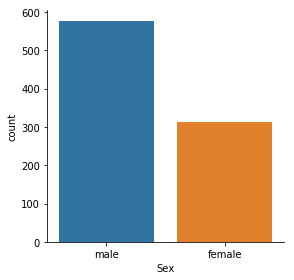

In [5]:
# Let's first check gender
# kind参数取值范围：point, bar, count, box, violin, strip，这里必须选count，否则会报错
sns.factorplot('Sex',data=Titanic_df,kind='count')

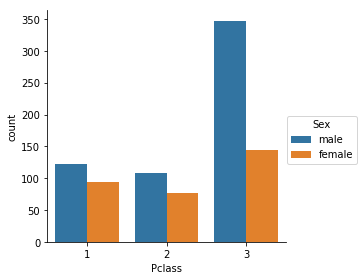

In [6]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.factorplot('Pclass',data=Titanic_df,kind='count',hue='Sex')

In [7]:
# 当使用性别和舱位区分后，从上面结果可以看出3等舱里男性数量比女性明显增多，我们增加一个列，用来区分是否是小孩，假定16岁以下为小孩。
# Create a column to separate whether it's man,woman orchild

def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

Titanic_df['Person'] = Titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [8]:
# Let's see if new column 'Person' worked, check out the first ten rows
Titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


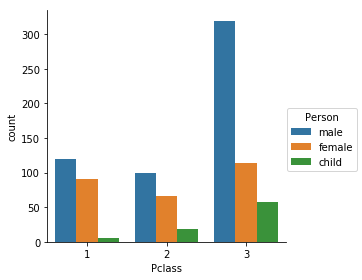

In [9]:
# 上图结果可以看到，新增列Person已经生成，并且Age小于16岁的都赋值为child
# 现在我们使用Person列来进行统计
sns.factorplot('Pclass',data=Titanic_df,hue='Person',kind='count')

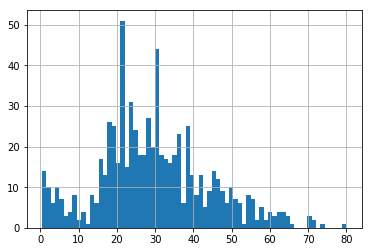

In [10]:
# 可以看出，3等舱里面男人和小孩明显比1等和2等多，1等里男人和小孩都是最少的
# 现在使用年龄来划分，得到一个分布图
Titanic_df['Age'].hist(bins=70)

In [11]:
# 从上图结果可以看出，成年人里面20岁和30岁两个年龄段的人数最多；小孩里面4岁以下的最多；70岁以上的人群非常少
# 现在按照男性，女性，小孩分别进行数量统计
Titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [12]:
# 查看平均年龄
Titanic_df['Age'].mean()

29.69911764705882

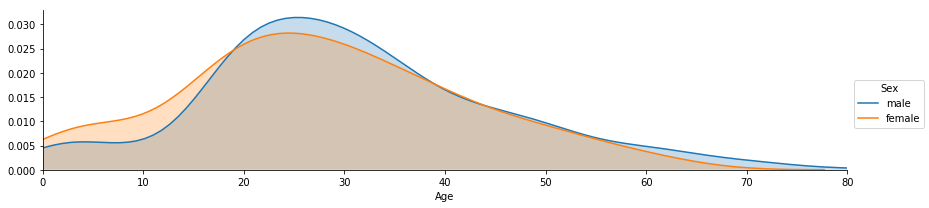

In [13]:
###使用Facet函数创建plot，以“Sex”字段区分等级，aspect=4代表宽度为之前的4倍，hue表示除row、col外的第三要素
fig = sns.FacetGrid(Titanic_df,hue="Sex",aspect=4)   

###使用map函数映射kde，以Age作为X轴
fig.map(sns.kdeplot,"Age",shade=True)
  
###取最大年龄
oldest = Titanic_df["Age"].max()
  
###设置x轴的取值范围为0到oldest
fig.set(xlim=(0,oldest))
  
###添加图标，印记
fig.add_legend()

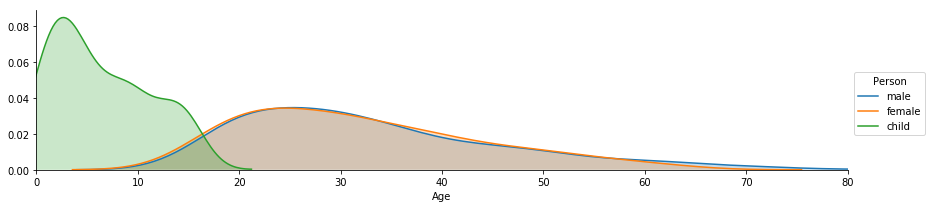

In [14]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(Titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = Titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

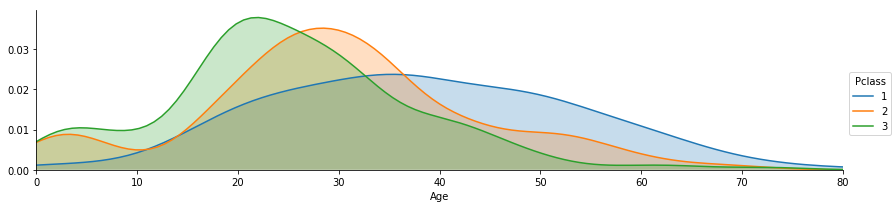

In [15]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(Titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = Titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [16]:
# 查看数据，注意Cabin取值，下面针对Cabin栏位进行统计
Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [17]:
# 统计不同船舱的人数分布
# 去掉无效的船舱纪录
deck = Titanic_df['Cabin'].dropna()

# 查看船舱类型数据，只查看头部记录
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

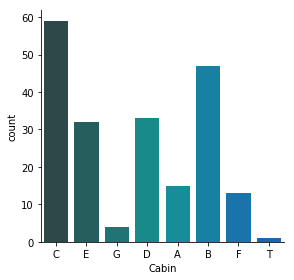

In [18]:
# 取全部Cabin记录，将首字母提取出来，存入levels列表
levels = []
for level in deck:
    levels.append(level[0])
    
# Palette代表调色板，颜色值有很多种，参考matplot网站(http://matplotlib.org/users/colormaps.html)，这里使用"winter_d"，
# 后面带'_d'表示将颜色调暗

# 使用舱位的首字母进行统计
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

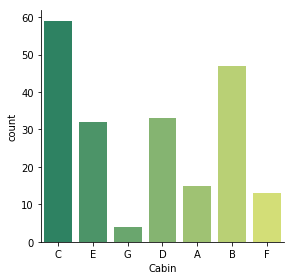

In [19]:
# T船舱的数据量太少，考虑删除，没想明白原因，估计是把T当做异常值处理
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

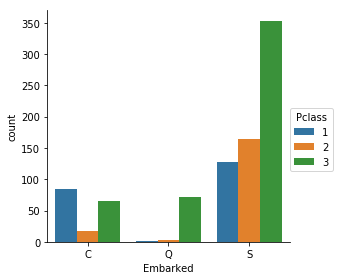

In [20]:
# 查看Kaggle网站可以知道C,Q,S分别代表：Cherbourg, Queenstown, Southhampton，表示船经过的港口
# 我们以舱位等级来统计，使用港口来区分，这里应该使用order参数而不是x_order参数，有些版本是用的x_order，其实不指定参数也可以得到相同结果
sns.factorplot('Embarked',data=Titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [21]:
# 上图可以发现，Queenstown这个地方登船的人基本上都在3等舱，可见当时Queenstown这个地方相对比较贫穷
# Southhampton这个地方是一个大港口，登船的人最多。

# 新增一列，标明乘客是否单身
Titanic_df['Alone'] =  Titanic_df.Parch + Titanic_df.SibSp
Titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [22]:
# 如果Alone取值大于0，表示该乘客有家人一起在船上
# 如果Alone取值等于0，表示该乘客是单身一人

Titanic_df['Alone'].loc[Titanic_df['Alone'] > 0] = 'With Family'
Titanic_df['Alone'].loc[Titanic_df['Alone'] == 0] = 'Alone'

Titanic_df.head()

# 如果需要消除以下warning信息，可以查看这个链接
# url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

/Users/jacksonshawn/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


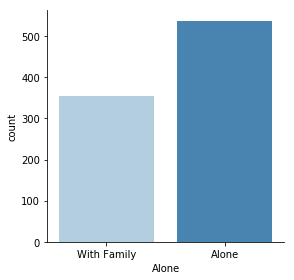

In [23]:
# 以是否单身来进行数据统计
sns.factorplot('Alone',data=Titanic_df,palette='Blues',kind='count')

In [24]:
# 接下来考虑这份统计表格里面，哪些因素对乘客获救的影响最大？

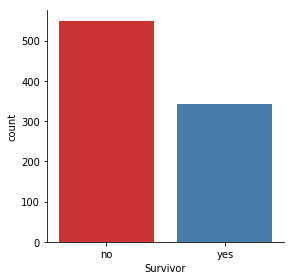

In [25]:
# 将获救如否的值映射成yes和no，然后进行数据统计
Titanic_df["Survivor"] = Titanic_df.Survived.map({0: "no", 1: "yes"})

# 注意：factoryplot函数第一个值取X轴，第二个值为Y轴
sns.factorplot('Survivor',data=Titanic_df,palette='Set1',kind='count')

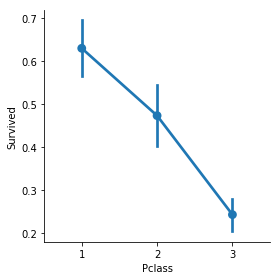

In [26]:
# 下面看船舱等级在获救人群中的权重，明显是1等舱高于2等舱高于3等舱，这里统计权重，参数kind不能使用count，要用point
# 不指定kind参数，默认也是用point
sns.factorplot('Pclass','Survived',data=Titanic_df,kind='point')

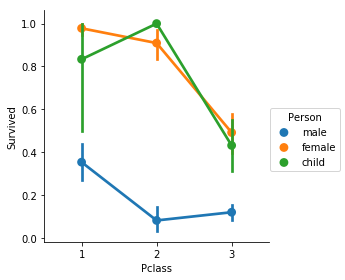

In [27]:
# 看看男性、女性、小孩在船舱等级中获救的权重比例
sns.factorplot('Pclass','Survived',hue='Person',data=Titanic_df)

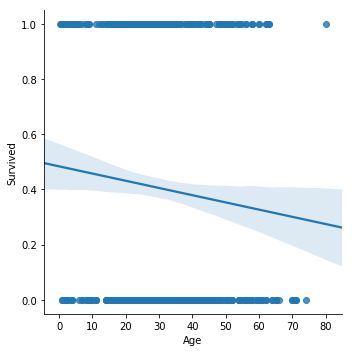

In [28]:
# 从上图可以看出，不管是1等舱，2等舱，还是3等舱，女性和小孩获救的权重都比男性高一些。而且，2等舱的小孩获救的权重比1等舱的要高。
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=Titanic_df)

In [29]:
# Looks like there is a general trend that the older the passenger was, the less likely they survived. 
# Let's go ahead and use hue to take a look at the effect of class and age.

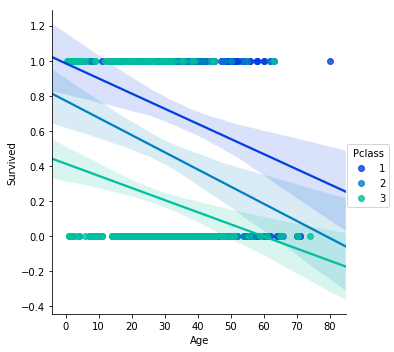

In [30]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=Titanic_df,palette='winter')

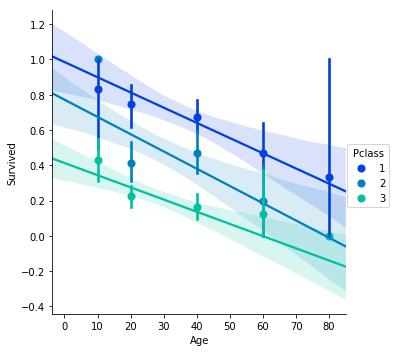

In [31]:
# We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=Titanic_df,palette='winter',x_bins=generations)

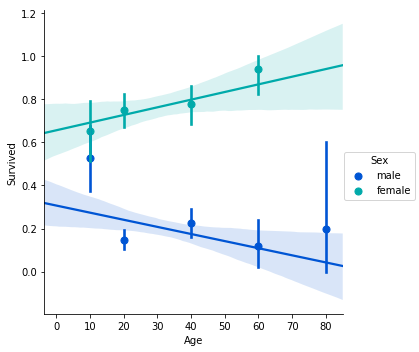

In [32]:
# 上图发现1等舱和2等舱，年龄越高，存活的可能性越低；1等舱的存活率普遍比2等舱高；2等舱存活率普遍比3等舱高
#Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?
sns.lmplot('Age','Survived',hue='Sex',data=Titanic_df,palette='winter',x_bins=generations)

In [33]:
# 从性别看出，女性的存活率比男性高
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')